In [ ]:
Pkg.resolve() # Installiert alle dependiencies aus Project.toml auf dem Rechner. Muss nur einmal ausgeführt werden.

In [9]:
Pkg.add("FileIO")

   Resolving package versions...
    Updating `C:\Users\Herbert\Documents\GitHub\AMO_Project\Project.toml`
  [5789e2e9] + FileIO v1.16.0
  No Changes to `C:\Users\Herbert\Documents\GitHub\AMO_Project\Manifest.toml`


In [ ]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()
Pkg.status()

In [11]:
# die pakete die wir für dieses Notebook brauchen
using HiGHS 
using JuMP
using Plots
using XLSX
using DataFrames
using Ipopt
using Complementarity
using Images
using FileIO

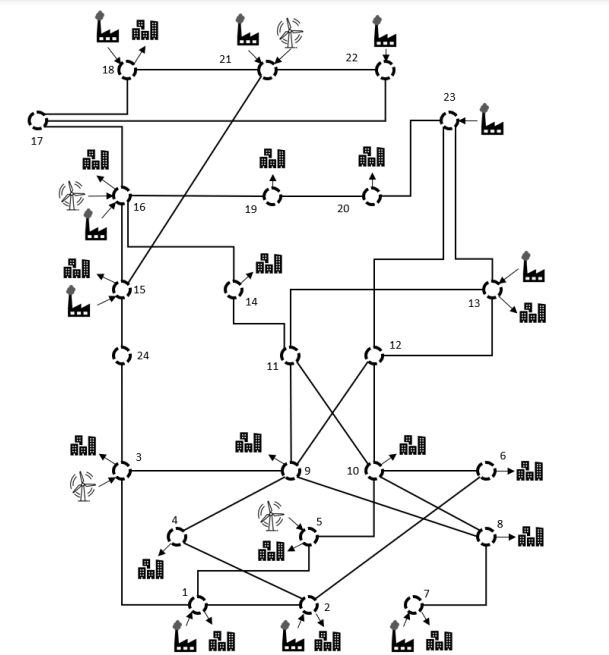

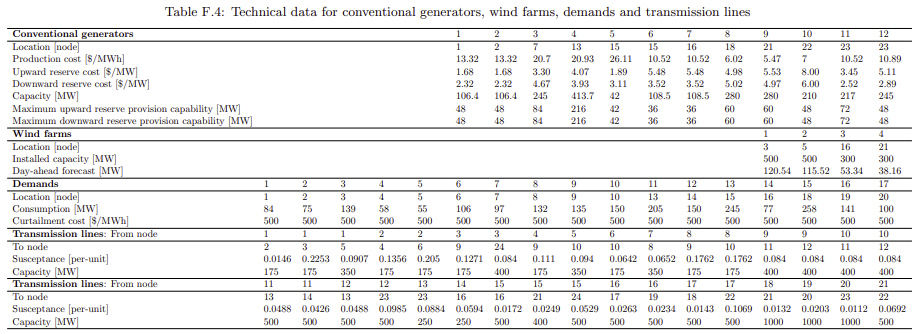

In [19]:
display("image/png", read("./resources/Model_visuell.PNG"))
display("image/png", read("./resources/Model_table.PNG"))


In [21]:
## Create the model: fixed wind generation, no transmission constraints, no reserve:  results in a one stage optimizing problem.
generators = Dict(
    :G1 => Dict(
        :capacity => 106.4,
        :offer => 13.32,
        :reserve_up_cost => 1.68,
        :reserve_down_cost => 2.32,
        :reserve_up_cap => 48,
        :reserve_down_cap => 48 
    ),
    :G2 => Dict(
        :capacity => 106.4,
        :offer => 13.32,
        :reserve_up_cost => 1.68,
        :reserve_down_cost => 2.32,
        :reserve_up_cap => 48,
        :reserve_down_cap => 48 
    ),
    :G3 => Dict(
        :capacity => 245,
        :offer => 20.7,
        :reserve_up_cost => 3.3,
        :reserve_down_cost => 4.67,
        :reserve_up_cap => 84,
        :reserve_down_cap => 84 
    ),
    :G4 => Dict(
        :capacity => 413.7,
        :offer => 20.93,
        :reserve_up_cost => 4.07,
        :reserve_down_cost => 3.93,
        :reserve_up_cap => 216,
        :reserve_down_cap => 216 
    ),
    :G5 => Dict(
        :capacity => 42,
        :offer => 26.11,
        :reserve_up_cost => 1.89,
        :reserve_down_cost => 3.11,
        :reserve_up_cap => 42,
        :reserve_down_cap => 42 
    ),
    :G6 => Dict(
        :capacity => 108.5,
        :offer => 10.52,
        :reserve_up_cost => 5.48,
        :reserve_down_cost => 3.52,
        :reserve_up_cap => 36,
        :reserve_down_cap => 36 
    ),
    :G7 => Dict(
        :capacity => 108.5,
        :offer => 10.52,
        :reserve_up_cost => 5.48,
        :reserve_down_cost => 3.52,
        :reserve_up_cap => 36,
        :reserve_down_cap => 36 
    ),
    :G8 => Dict(
        :capacity => 280,
        :offer => 6.02,
        :reserve_up_cost => 4.98,
        :reserve_down_cost => 5.02,
        :reserve_up_cap => 60,
        :reserve_down_cap => 60 
    ),
    :G9 => Dict(
        :capacity => 280,
        :offer => 5.47,
        :reserve_up_cost => 5.53,
        :reserve_down_cost => 4.97,
        :reserve_up_cap => 48,
        :reserve_down_cap => 60 
    ),
    :G10 => Dict(
        :capacity => 210,
        :offer => 7,
        :reserve_up_cost => 8,
        :reserve_down_cost => 6,
        :reserve_up_cap => 48,
        :reserve_down_cap => 48 
    ),
    :G11 => Dict(
        :capacity => 217,
        :offer => 10.52,
        :reserve_up_cost => 3.45,
        :reserve_down_cost => 2.52,
        :reserve_up_cap => 72,
        :reserve_down_cap => 72 
    ),
    :G12 => Dict(
        :capacity => 245,
        :offer => 10.89,
        :reserve_up_cost => 5.11,
        :reserve_down_cost => 2.89,
        :reserve_up_cap => 48,
        :reserve_down_cap => 48 
    )
)
wind = Dict(
    :W1 => Dict(
        :capacity => 500,
        :forecast => 120.54
    ),
    :W1 => Dict(
        :capacity => 500,
        :forecast => 115.52
    ),
    :W1 => Dict(
        :capacity => 300,
        :forecast => 53.34
    ),
    :W1 => Dict(
        :capacity => 300,
        :forecast => 38.16
    )
)



Dict{Symbol, Dict{Symbol, Real}} with 1 entry:
  :G1 => Dict(:reserve_up_cost=>1.68, :reserve_down_cost=>2.32, :offer=>13.32, …